<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/Assignment_2_Babak_Ansari_Convolutional_Neural_Nets_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Babak Ansari-Jaberi

## Data Prepration

### Flower images should be downloaded into the current folder
  
Creating a function to resize the image files in `flower_photos` folder and save them into a new `data`  folder

In [259]:
# required packages that might be missing and settings
#!pip3 install PIL  --allow-unverified PIL --allow-all-external
%config IPCompleter.greedy=True

Function to convert image sizes and save in a destination folder

In [260]:
import os, sys
from PIL import Image

# Supress warning and informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

img_height = 150 
img_width = 150

# Function to resize a single image
def resize_photo(infile, outfile, width, height):   
    size = width, height

    if not os.path.exists(os.path.dirname(outfile)):
        try:
            os.makedirs(os.path.dirname(outfile))
        except OSError as exc: # Guard against race condition
            raise

    try:
        im = Image.open(infile)
        im.thumbnail(size, Image.ANTIALIAS) 
        im.save(outfile, "JPEG")
        im = Image.open(outfile)
    except IOError:
        raise
    return im

Function to add images to Data Frame for normalizing the distribution of flower kinds:

In [261]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output # Print on the same line to show the progress

# Function to populate a data frame of image paths and their kinds
def photos_to_dataframe(idx, image_path):
    flower_kind = image_path.replace('flower_photos', '').replace('/','')
    
    onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

    df = pd.DataFrame(columns=['id', 'kind', 'image', 'path'])
    
    for imgfile in onlyfiles:
        clear_output(wait=True)
        print('Processing files in "' + image_path + '" folder.\r\n'+ imgfile)
        df.loc[idx] = [idx, flower_kind, imgfile, image_path]
        idx=idx+1
    clear_output(wait=True)
    print('Processing files in "' + image_path + '" folder is finished.')
    return df

Create a data frame of all images and their flower kinds to be used for preprocessing (e.g. normalizing the flower kinds distribution)

In [262]:
daisy_df = photos_to_dataframe(0, 'flower_photos/daisy/')
dandelion_df = photos_to_dataframe(len(daisy_df)+1, 'flower_photos/dandelion/')
roses_df = photos_to_dataframe(len(dandelion_df)+1, 'flower_photos/roses/')
sunflowers_df = photos_to_dataframe(len(roses_df)+1, 'flower_photos/sunflowers/')
tulips_df = photos_to_dataframe(len(sunflowers_df)+1, 'flower_photos/tulips/')

df_main = daisy_df.append(dandelion_df).append(roses_df).append(sunflowers_df).append(tulips_df).sort_values(by=['kind'])

Processing files in "flower_photos/tulips/" folder is finished.


In [263]:
df_main.head()

,id,kind,image,path
0,0,daisy,100080576_f52e8ee070_n.jpg,flower_photos/daisy/
418,418,daisy,4858518329_7563eb0baa_m.jpg,flower_photos/daisy/
419,419,daisy,4861391074_c3e122dab0_m.jpg,flower_photos/daisy/
420,420,daisy,4865691548_00319261b8.jpg,flower_photos/daisy/
421,421,daisy,488202750_c420cbce61.jpg,flower_photos/daisy/


### The images have different dimensions. Resize all of them to 150x150.

Normalize the flowe kinds folder for analysis

In [272]:
# One hot encoding the flower kinds
df = pd.concat([df_main,pd.get_dummies(df_main['kind'], drop_first=False)],axis=1)
df.head()

,id,kind,image,path,daisy,dandelion,roses,sunflowers,tulips
0,0,daisy,100080576_f52e8ee070_n.jpg,flower_photos/daisy/,1,0,0,0,0
418,418,daisy,4858518329_7563eb0baa_m.jpg,flower_photos/daisy/,1,0,0,0,0
419,419,daisy,4861391074_c3e122dab0_m.jpg,flower_photos/daisy/,1,0,0,0,0
420,420,daisy,4865691548_00319261b8.jpg,flower_photos/daisy/,1,0,0,0,0
421,421,daisy,488202750_c420cbce61.jpg,flower_photos/daisy/,1,0,0,0,0


### Split images to 75-25% for training and test:

Make sure the distribution is random `shuffle=True`

In [273]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, shuffle=True)

### Make sure you have the same distribution of flower types between train and test datasets:
The distribution of the rows are the same for both train and test.
As you could see in bellow statistical summary for train and test set. The average number of all flower kinds are very close. Meaning that each flower kind is distributed evenly in test and training set.

In [274]:
train.describe()

,daisy,dandelion,roses,sunflowers,tulips
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,0.172602,0.248547,0.172965,0.189680,0.216206
std,0.377971,0.432249,0.378286,0.392119,0.411731
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
test.describe()

,daisy,dandelion,roses,sunflowers,tulips
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.172113,0.233115,0.179739,0.192810,0.222222
std,0.377685,0.423046,0.384179,0.394721,0.415966
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


The mean and std are almost the same in train and test sets as you could see in above summary.

Now creating data frames with total flower kinds in train and test to analyse the total flower kinds in tran and test set:

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

df_kinds = pd.DataFrame({'count' : df.groupby( [ "kind" ] ).size()}).reset_index()
train_kinds = pd.DataFrame({'count' : train.groupby( [ "kind" ] ).size()}).reset_index()
test_kinds = pd.DataFrame({'count' : test.groupby( [ "kind" ] ).size()}).reset_index()
df_kinds

,kind,count
0,daisy,633
1,dandelion,898
2,roses,641
3,sunflowers,699
4,tulips,799


Normalize the counts

In [277]:
from sklearn import preprocessing


df_kinds[['count']] = preprocessing.minmax_scale(df_kinds[['count']])
train_kinds[['count']] = preprocessing.minmax_scale(train_kinds[['count']])
test_kinds[['count']] = preprocessing.minmax_scale(test_kinds[['count']])

The following graph bellow is showing that the distribution of flower kinds are normal between Blue (Entire set), Red (Train set) and (Green set)

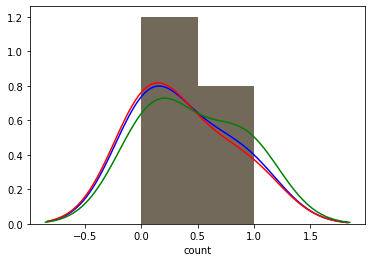

In [278]:
sns.distplot(df_kinds['count'], color="Blue", label="All")
sns.distplot(train_kinds['count'], color="Red")
sns.distplot(test_kinds['count'], color="Green")

The following bar charts are also showing the distribution of flower kinds are the same (With different scaling) on test and training data sets

[Text(0, 0, 'daisy'),
 Text(0, 0, 'dandelion'),
 Text(0, 0, 'roses'),
 Text(0, 0, 'sunflowers'),
 Text(0, 0, 'tulips')]

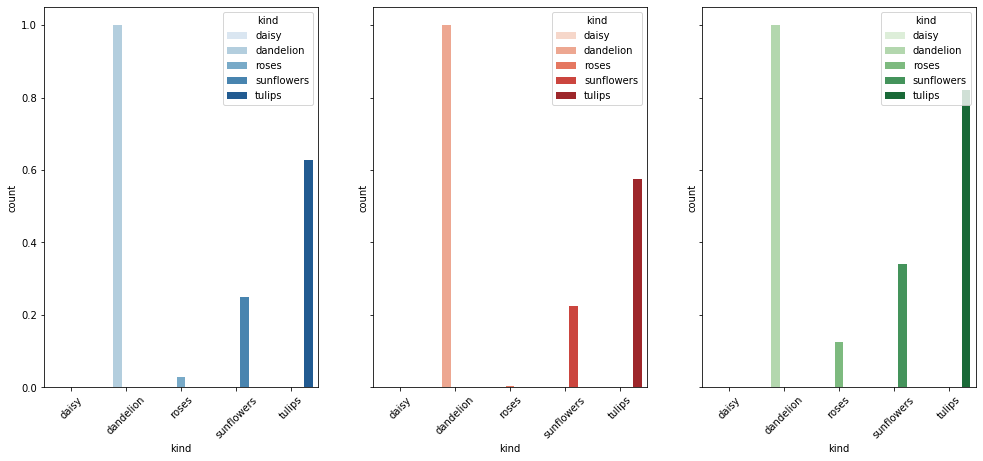

In [279]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16.7, 7))

a1 = sns.barplot(x="kind", y="count", hue="kind", data=df_kinds, palette="Blues", ax=ax1)
a2 = sns.barplot(x="kind", y="count", hue="kind", data=train_kinds, palette="Reds", ax=ax2)
a3 = sns.barplot(x="kind", y="count", hue="kind", data=test_kinds, palette="Greens", ax=ax3)

a1.set_xticklabels(a1.get_xticklabels(), rotation=45)
a2.set_xticklabels(a2.get_xticklabels(), rotation=45)
a3.set_xticklabels(a3.get_xticklabels(), rotation=45)



#### Now we know our dataset is correct so we could create the trainable folder for Keras.

We could create a trainable folder structure for `Keras` now that we know our training and test set are having same flower type distribution.

For that we could loop throught both train and test data frames and create `data\train\{flower kind}` and `data\validate\{flower kind}` folders respectively.

In [304]:
def create_files_for_training(df, train_test_name):
    for index, row in df.iterrows():
        source_loc = row['path']+row['image']
        dest_loc = 'data/' + train_test_name + '/' + row['kind'] + '/' + row['image']
        img = resize_photo(source_loc, dest_loc, 150, 150)
        clear_output(wait=True)
        print('Create flower image in '+ dest_loc + ' folder.\r\n')
    print('Creating images for '+train_test_name+' in ' + 'data/' + train_test_name  + ' folder is done.')
    return 'data/' + train_test_name

Create the train and test folders:

In [305]:
train_folder = create_files_for_training(train, 'train')
validate_folder = create_files_for_training(test, 'validate')

print('The training folder is: '+ train_folder + ' and validation folder is: '+validate_folder)

Create flower image in data/validate/tulips/15632065904_0d9caf174b.jpg folder.

Creating images for validate in data/validate folder is done.
The training folder is: data/train and validation folder is: data/validate


## Model

###  Use a VGG16 model (pre-trained on ImageNet)
Use VGG16 class has a parameter called `include_top` which could remove the top layers (fully connected layers) when is set `False`. 
Trying to remove the layer using `layers.pop()` function is not as straight so use this feature to remove the top layers:

In [319]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
input_tensor = Input(shape=(150,150,3))
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
model_vgg16_conv.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Add fully connected layers
One with 256 nodes using ‘relu’ activation and output layer with 5 nodes and ‘softmax’ activation

In [320]:

last = model_vgg16_conv.output

x = Flatten(name='flatten_layer')(last)
x = Dense(256, activation='relu')(x)
preds = Dense(5, activation='softmax')(x)

new_model = Model(model_vgg16_conv.input, preds)

In [321]:
new_model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0  

### Freez all VGG16 layers
Train (fine-tune) and evaluate the model

In [326]:
# This function displays the trainability of the layers
def print_layers_trainability(model):
    for layer in model.layers:
        print('The ' + layer.name + ' layer freezing status is ' + str(layer.trainable))

print_layers_trainability(new_model)

The input_23 layer freezing status is False
The block1_conv1 layer freezing status is True
The block1_conv2 layer freezing status is True
The block1_pool layer freezing status is True
The block2_conv1 layer freezing status is True
The block2_conv2 layer freezing status is True
The block2_pool layer freezing status is True
The block3_conv1 layer freezing status is True
The block3_conv2 layer freezing status is True
The block3_conv3 layer freezing status is True
The block3_pool layer freezing status is True
The block4_conv1 layer freezing status is True
The block4_conv2 layer freezing status is True
The block4_conv3 layer freezing status is True
The block4_pool layer freezing status is True
The block5_conv1 layer freezing status is True
The block5_conv2 layer freezing status is True
The block5_conv3 layer freezing status is True
The block5_pool layer freezing status is True
The flatten_layer layer freezing status is True
The dense_54 layer freezing status is True
The dense_55 layer freez

In [327]:
# LOCK THE TOP CONV LAYERS
for layer in new_model.layers:
    if layer.name == 'flatten_layer':
        break;
    print('Freezing ' + layer.name + ' layer')
    layer.trainable = False
    
print_layers_trainability(new_model)

Freezing input_23 layer
Freezing block1_conv1 layer
Freezing block1_conv2 layer
Freezing block1_pool layer
Freezing block2_conv1 layer
Freezing block2_conv2 layer
Freezing block2_pool layer
Freezing block3_conv1 layer
Freezing block3_conv2 layer
Freezing block3_conv3 layer
Freezing block3_pool layer
Freezing block4_conv1 layer
Freezing block4_conv2 layer
Freezing block4_conv3 layer
Freezing block4_pool layer
Freezing block5_conv1 layer
Freezing block5_conv2 layer
Freezing block5_conv3 layer
Freezing block5_pool layer
The input_23 layer freezing status is False
The block1_conv1 layer freezing status is False
The block1_conv2 layer freezing status is False
The block1_pool layer freezing status is False
The block2_conv1 layer freezing status is False
The block2_conv2 layer freezing status is False
The block2_pool layer freezing status is False
The block3_conv1 layer freezing status is False
The block3_conv2 layer freezing status is False
The block3_conv3 layer freezing status is False
The

In [324]:
print('Train folder: ' + train_folder + '\r\n')
print('Validation folder:' + validate_folder + '\r\n')

'data/validate'

In [325]:
from keras import applications, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input
import keras

batch_size = 32
epochs = 3
# COMPILE THE MODEL - Use categorical crossentropy because we have four classes of flower kinds
new_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# CREATE THE IMAGE GENERATORS
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_folder,
                        target_size=(img_height,img_width),
                        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
                            validate_folder,
                            target_size=(img_height,img_width),
                            batch_size=batch_size)


#  FIT THE MODEL
history = new_model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Found 3440 images belonging to 5 classes.
Found 1606 images belonging to 5 classes.
Epoch 1/3
108/108 [==============================] - 936s 9s/step - loss: 1.2661 - accuracy: 0.5047 - val_loss: 0.5446 - val_accuracy: 0.7092
Epoch 2/3
108/108 [==============================] - 910s 8s/step - loss: 0.6311 - accuracy: 0.7683 - val_loss: 0.1868 - val_accuracy: 0.7983
Epoch 3/3
108/108 [==============================] - 988s 9s/step - loss: 0.4745 - accuracy: 0.8297 - val_loss: 0.1037 - val_accuracy: 0.8306


Save the model for future use:

In [317]:
new_model.save('flower_category1.model')

#### Experiments
- First try with 5 epoch the model had `0.89` percent accuracy and `0.36` percent loss. But reduce the epochs to 3 to have faster training performance.
- Second experiment is with 3 epochs. The model had `0.84` percent accuracy and `0.10` percent loss.
-  The Loss and Accuracy plot shows the model is improving in each epoch

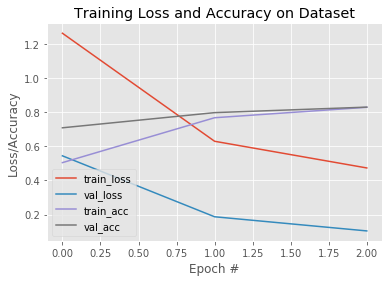

In [336]:
### plt.style.use("ggplot")
def plot_model(training_history)
    plt.figure()
    plt.plot(np.arange(0, 3), training_history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, 3), training_history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, 3), training_history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, 3), training_history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    
plot_model(history)

### Unfreeze the last block of VGG16 (block5)

Re-train and evaluate the model

In [340]:

model.get_layer('block5_conv1').trainable = True
model.get_layer('block5_conv2').trainable = True
model.get_layer('block5_conv3').trainable = True
model.get_layer('block5_pool').trainable = True

print_layers_trainability(model)

The input_17 layer freezing status is False
The block1_conv1 layer freezing status is False
The block1_conv2 layer freezing status is False
The block1_pool layer freezing status is False
The block2_conv1 layer freezing status is False
The block2_conv2 layer freezing status is False
The block2_pool layer freezing status is False
The block3_conv1 layer freezing status is False
The block3_conv2 layer freezing status is False
The block3_conv3 layer freezing status is False
The block3_pool layer freezing status is False
The block4_conv1 layer freezing status is False
The block4_conv2 layer freezing status is False
The block4_conv3 layer freezing status is False
The block4_pool layer freezing status is False
The block5_conv1 layer freezing status is True
The block5_conv2 layer freezing status is True
The block5_conv3 layer freezing status is True
The block5_pool layer freezing status is True
The flatten_layer layer freezing status is True
The dense_40 layer freezing status is True
The dense_

In [ ]:
#  FIT THE MODEL
history2 = new_model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/3
108/108 [==============================] - 949s 9s/step - loss: 0.4142 - accuracy: 0.8468 - val_loss: 0.2434 - val_accuracy: 0.8263
Epoch 2/3
108/108 [==============================] - 905s 8s/step - loss: 0.3648 - accuracy: 0.8666 - val_loss: 0.0970 - val_accuracy: 0.8599
Epoch 3/3
 99/108 [==========================>...] - ETA: 1:11 - loss: 0.3326 - accuracy: 0.8791

In [ ]:
new_model.save('flower_category2.model')

#### Experiments
- The experiment for unfreeze the last block of VGG16 with 3 epochs. The model had `0.84` percent accuracy and `0.10` percent loss.
- The Loss and Accuracy plot shows the model is improving in each epoch

In [ ]:

    
plot_model(history2)